In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from keras.layers import Input, Reshape, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [2]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\data"):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    data.append(np.array(x))
del paths

In [3]:
np.save('lowres128',data)

In [3]:
data = np.load('highres.npy')

In [4]:
low = np.load('lowres128.npy')

In [6]:
data = data/256
data.shape

(1000, 256, 256, 3)

In [8]:
low.shape

(1000, 128, 128, 3)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(low, data, test_size=0.25, shuffle=True, random_state=69)
del data
del low

In [7]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(2,2), input_shape=(128, 128, 3), padding="same"))
model.add(Conv2D(128, kernel_size=(2,2), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(4,4), padding="same", activation = 'relu'))
model.add(Conv2D(128, kernel_size=(5,5), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(UpSampling2D())
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation = 'relu'))
model.add(Conv2D(128, kernel_size=(2,2), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(4,4), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(2,2), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(5,5), padding="same", activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(3, kernel_size=(2,2), padding="same", activation = 'relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 128)     1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     262272    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 128)     409728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 128)     0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 256, 128)    

In [8]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=5, verbose=1,validation_data=(x_test, y_test),callbacks=callbacks_list)

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 68s 91ms/step - loss: 0.1028 - val_loss: 0.0134
Epoch 2/20
750/750 [==============================] - 65s 86ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 3/20
750/750 [==============================] - 67s 89ms/step - loss: 0.0089 - val_loss: 0.0093
Epoch 4/20
750/750 [==============================] - 68s 90ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 5/20
750/750 [==============================] - 68s 90ms/step - loss: 0.0063 - val_loss: 0.0072
Epoch 6/20
750/750 [==============================] - 67s 89ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 7/20
750/750 [==============================] - 68s 91ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 8/20
750/750 [==============================] - 68s 90ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 9/20
750/750 [==============================] - 69s 92ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 10/20
750/750 [===============

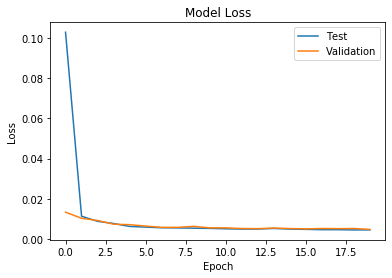

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [12]:
model.save('DLSS1.h5')

In [3]:
model = load_model('DLSS1.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


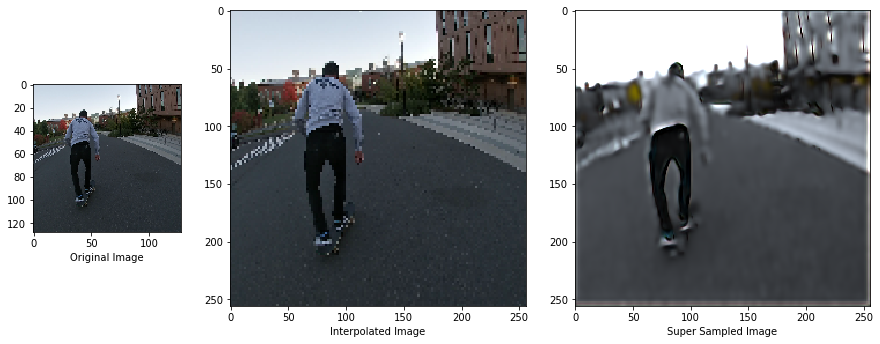

In [4]:
#select image
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\data\00290.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,2,2]})
axarr[0].set_xlabel('Original Image', fontsize=10)
axarr[1].set_xlabel('Interpolated Image', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image', fontsize=10)

#original image
x = img.resize((128,128))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,128,128,3)
result = np.array(model.predict_on_batch(x))*10
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


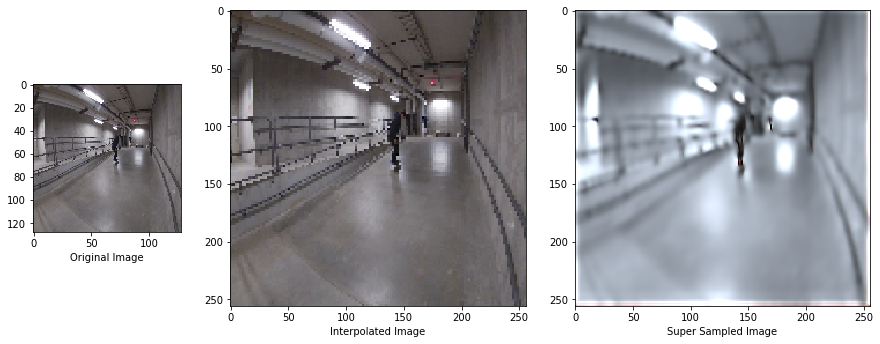

In [5]:
#select image
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\data\00071.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,2,2]})
axarr[0].set_xlabel('Original Image', fontsize=10)
axarr[1].set_xlabel('Interpolated Image', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image', fontsize=10)

#original image
x = img.resize((128,128))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,128,128,3)
result = np.array(model.predict_on_batch(x))*10
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


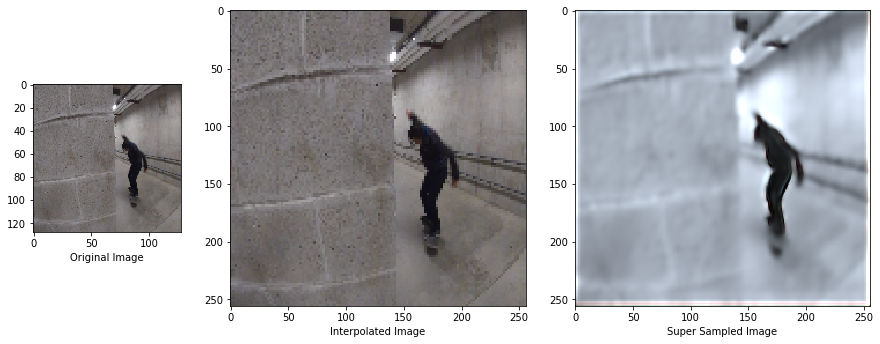

In [7]:
#select image
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\data\00160.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,2,2]})
axarr[0].set_xlabel('Original Image', fontsize=10)
axarr[1].set_xlabel('Interpolated Image', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image', fontsize=10)

#original image
x = img.resize((128,128))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,128,128,3)
result = np.array(model.predict_on_batch(x))*10
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)